# Interpreting Visition Transformer With TAM Interpreters

In [1]:
import paddle
import interpretdl as it

In [ ]:
# load vit model and weights
!wget -c https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ViT_base_patch16_224_pretrained.pdparams -P assets/

from assets.vision_transformer import ViT_base_patch16_224
paddle_model = ViT_base_patch16_224()
MODEL_PATH = 'assets/ViT_base_patch16_224_pretrained.pdparams'
paddle_model.set_dict(paddle.load(MODEL_PATH))

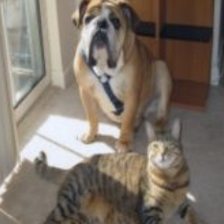

In [12]:
from PIL import Image
from interpretdl.data_processor.readers import read_image

img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

In [ ]:
tam = it.TAMInterpreter(paddle_model, device='gpu:0')

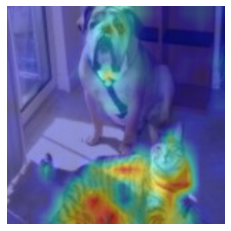

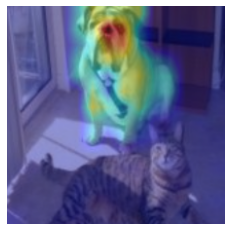

In [13]:
heatmap = tam.interpret(
        img_path,
        start_layer=4,
        label=None,  # cat
        visual=True,
        save_path=None)
heatmap = tam.interpret(
        img_path,
        start_layer=4,
        label=243,  # dog
        visual=True,
        save_path=None)

In [7]:
# get more samples.
!wget -c https://github.com/PaddlePaddle/InterpretDL/files/7378752/samples.tar.gz
!tar -xf samples.tar.gz

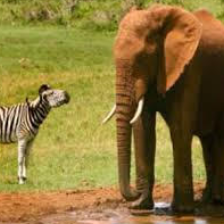

In [10]:
img_path = 'samples/el1.png'
x = Image.fromarray(read_image(img_path)[0])
x

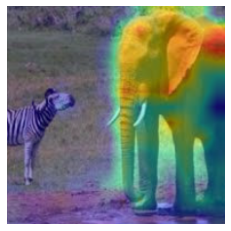

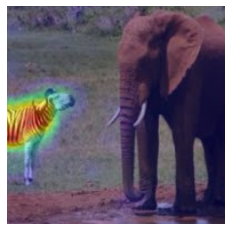

In [9]:
tam = it.TAMInterpreter(paddle_model, device='gpu:0')
img_path = 'samples/el1.png'
heatmap = tam.interpret(
        img_path,
        start_layer=4,
        label=None,  # elephant
        visual=True,
        save_path=None)

img_path = 'samples/el1.png'
heatmap = tam.interpret(
        img_path,
        start_layer=4,
        label=340,  # zebra
        visual=True,
        save_path=None)

See more details from the paper:

Tingyi Yuan, Xuhong Li, Haoyi Xiong, Hui Cao, Dejing Dou. Explaining Information Flow Inside Vision Transformers Using Markov Chain. In *Neurips 2021 XAI4Debugging Workshop*. https://openreview.net/forum?id=TT-cf6QSDaQ